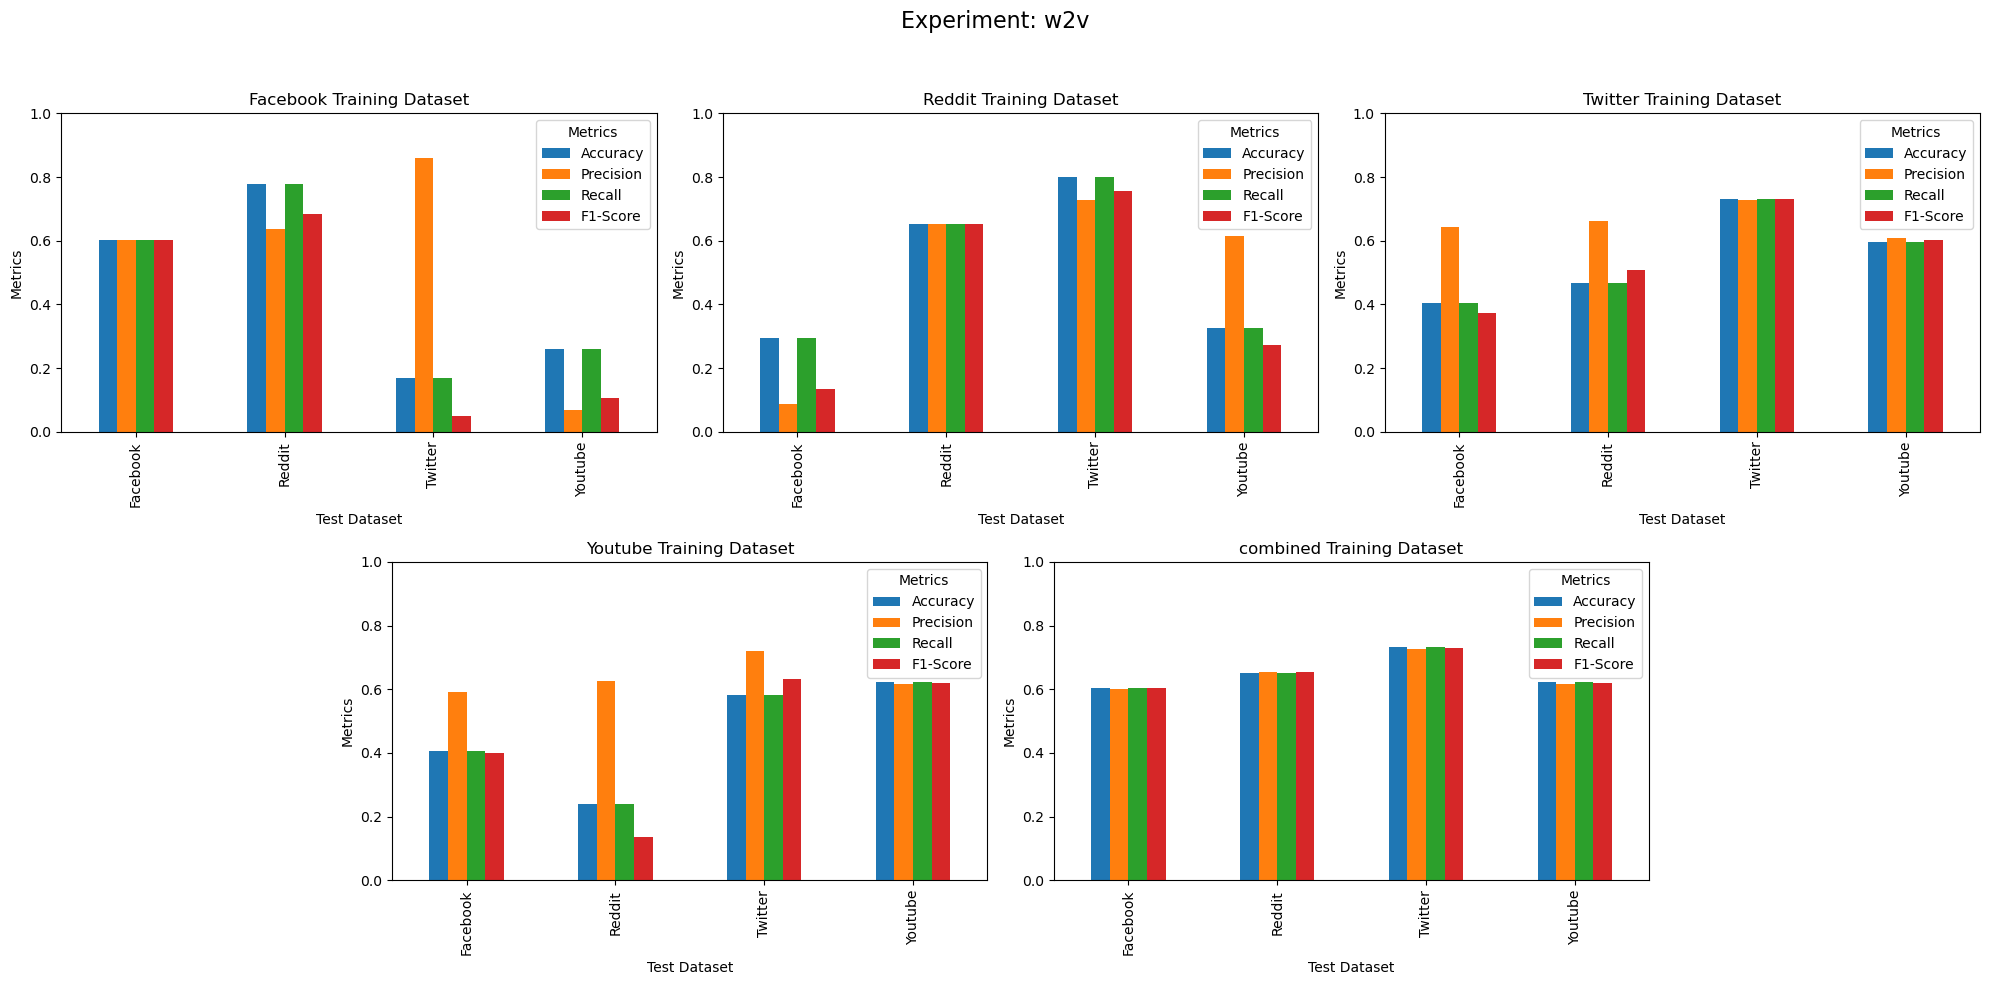

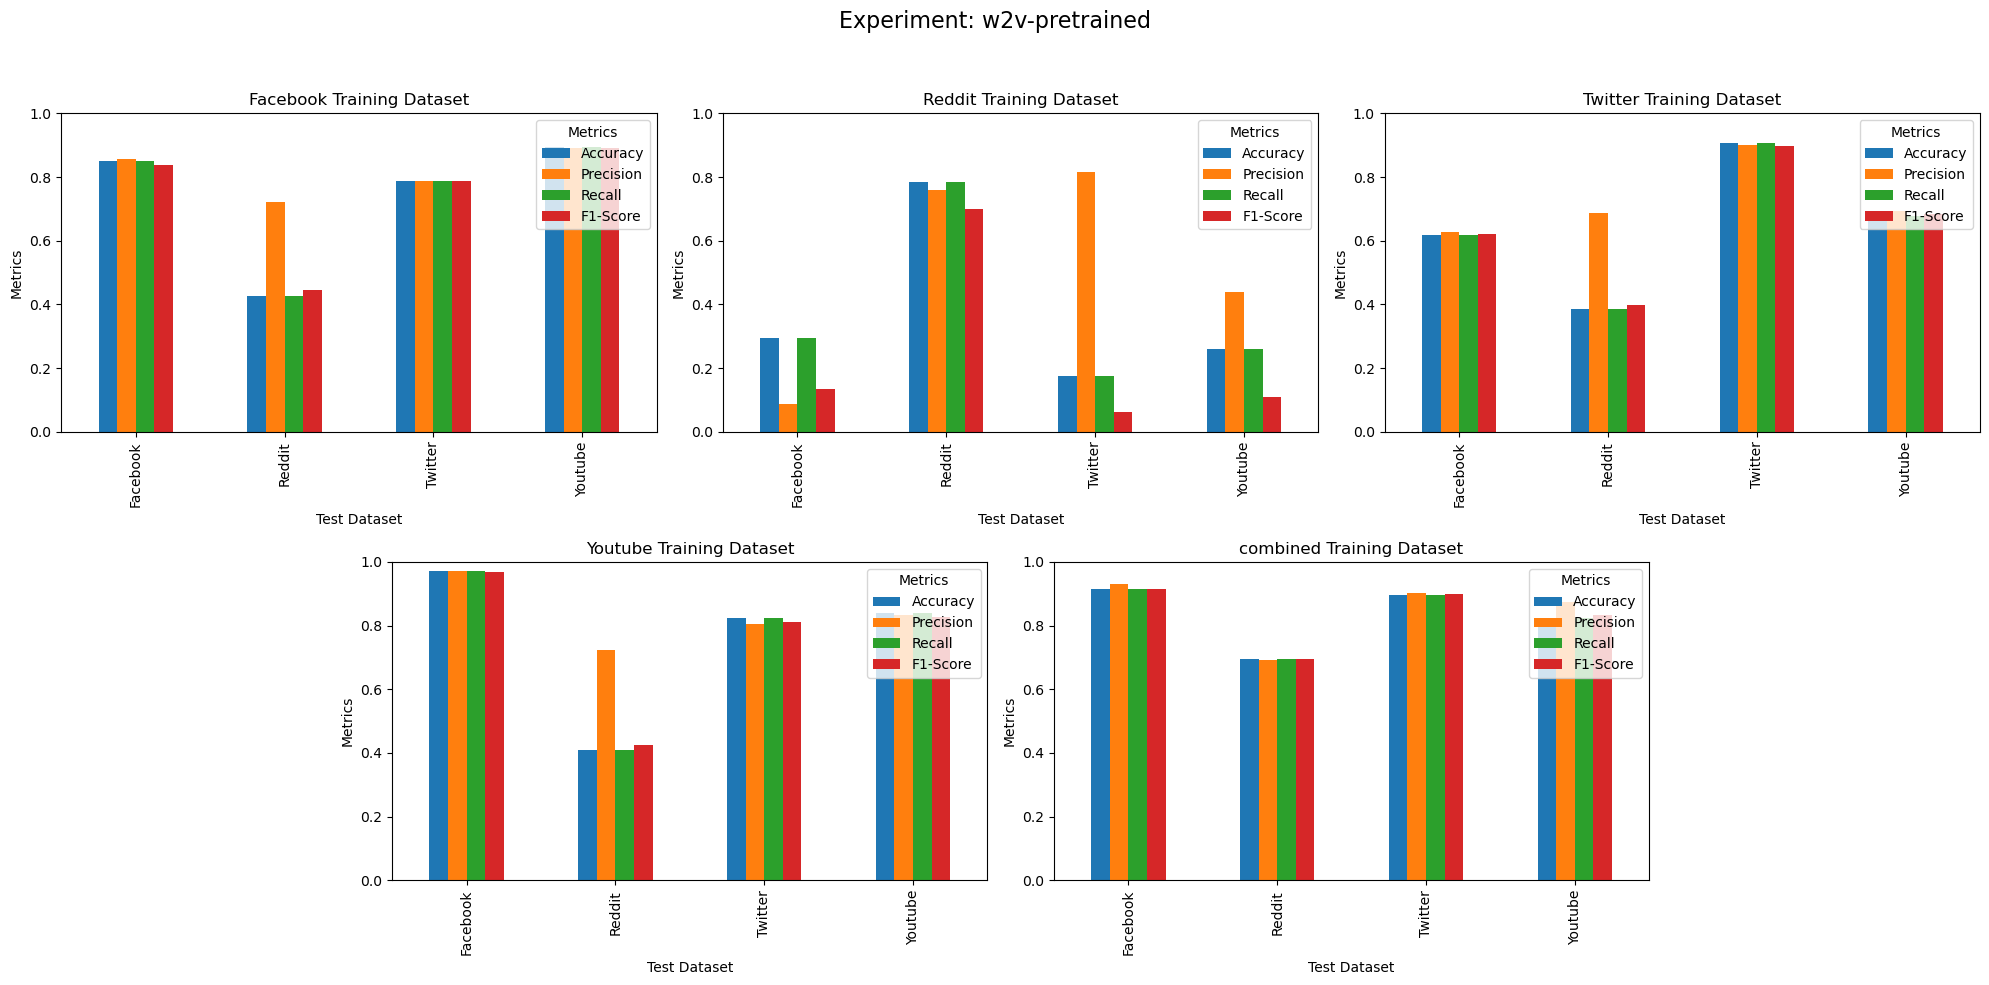

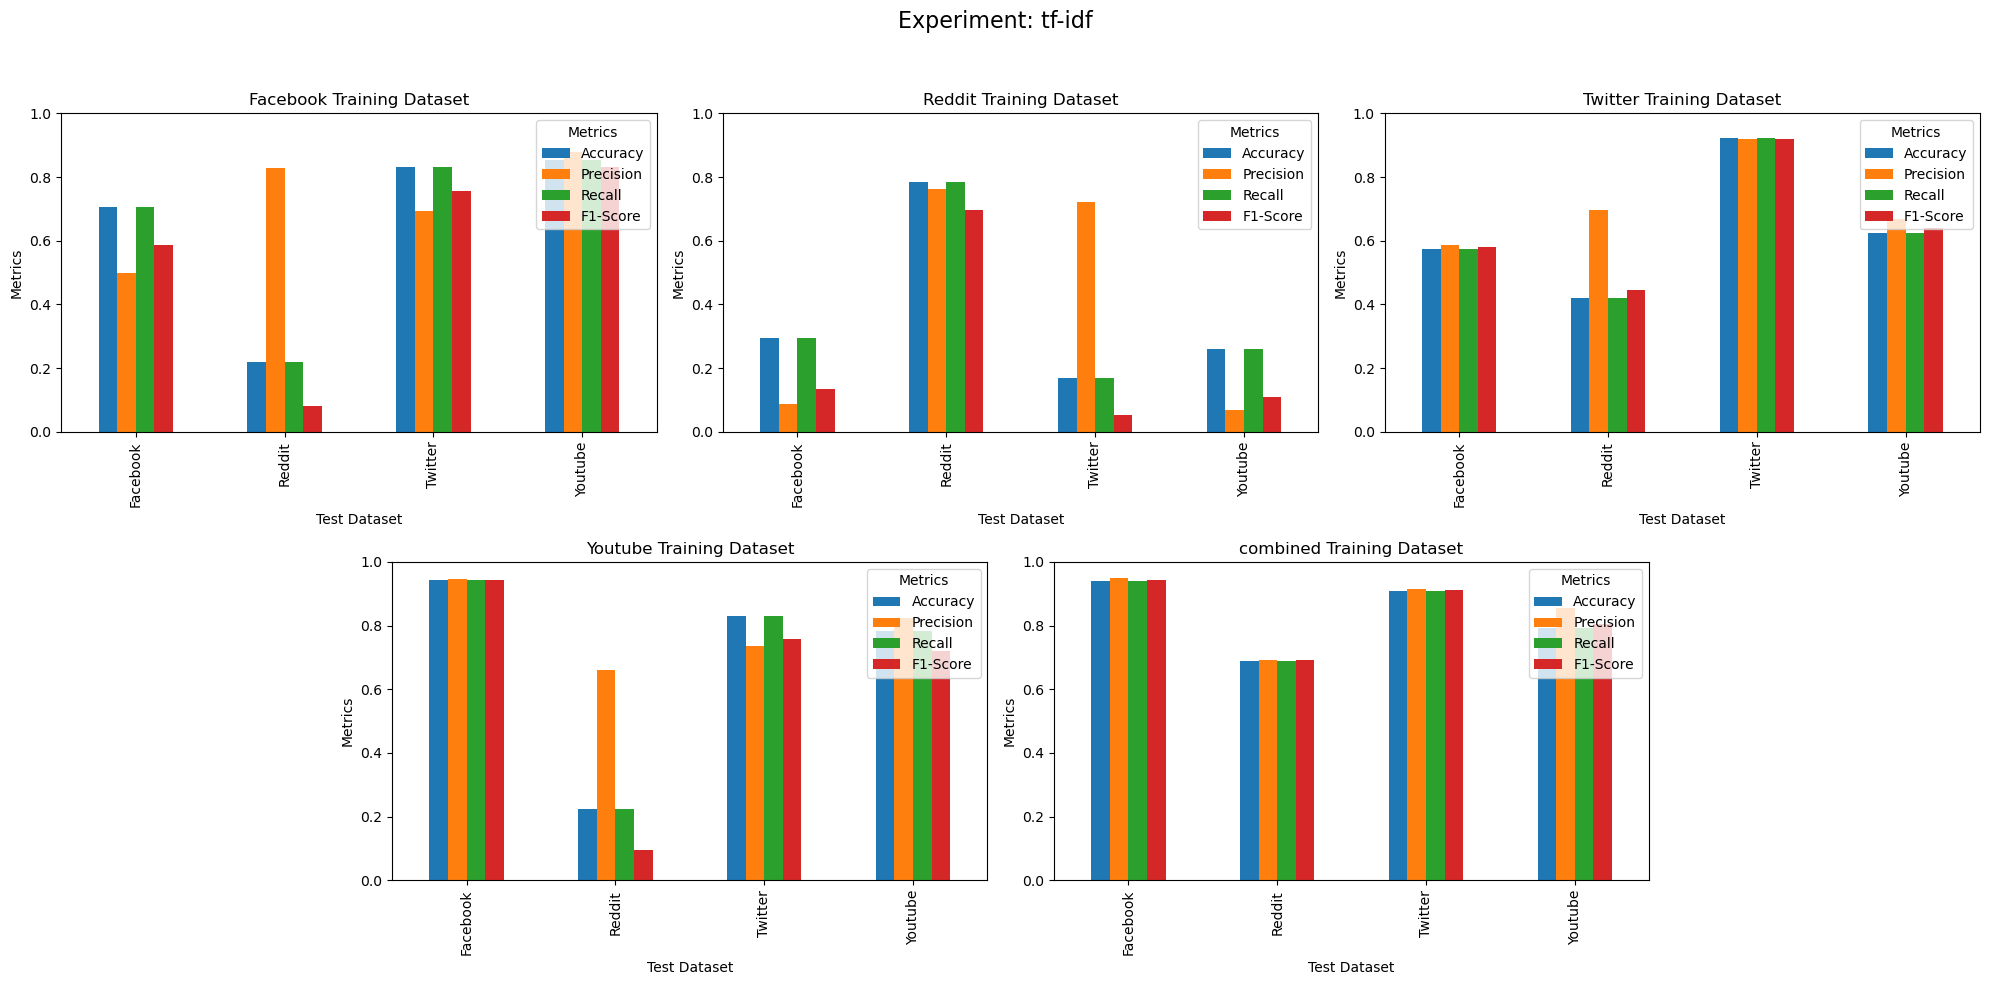

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Define a dictionary of filenames (key: name of the test, value: filename)
filenames = {
    'w2v': 'w2v_classification_results.csv',
    'w2v-pretrained': 'w2v_pretrained_classification_results.csv',
    'tf-idf': 'tfidf_classification_results.csv'
}

# Load the data for each filename
dataframes = {name: pd.read_csv(filename) for name, filename in filenames.items()}

# Metrics to plot in the desired order
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create plots for each experiment
for exp_name, df in dataframes.items():
    # Filter the overall class metrics
    df_overall = df[df['Class'] == 'overall']
    
    # Create a figure for the histograms
    fig = plt.figure(figsize=(20, 10))
    fig.suptitle(f'Experiment: {exp_name}', fontsize=16)
    
    # Create a GridSpec with 2 rows and 6 columns (3 for top row, 2 for bottom row, and extra space for offset)
    gs = gridspec.GridSpec(2, 6, figure=fig)
    
    train_datasets = df_overall['Train Dataset'].unique()
    num_datasets = len(train_datasets)
    
    # Top row
    for i in range(min(num_datasets, 3)):
        ax = fig.add_subplot(gs[0, i*2:(i*2+2)])
        train_dataset = train_datasets[i]
        train_data = df_overall[df_overall['Train Dataset'] == train_dataset]
        
        # Rearrange the data to ensure the desired order of metrics
        plot_data = pd.DataFrame()
        for metric in metrics:
            plot_data[metric] = train_data.pivot(index='Test Dataset', columns='Train Dataset', values=metric)[train_dataset]
        
        # Plot the histogram for each metric
        plot_data.plot(kind='bar', ax=ax)
        ax.set_title(f'{train_dataset} Training Dataset')
        ax.set_xlabel('Test Dataset')
        ax.set_ylabel('Metrics')
        ax.legend(loc='upper right', title='Metrics')
        ax.set_ylim(0, 1)

    # Bottom row
    for i in range(3, num_datasets):
        ax = fig.add_subplot(gs[1, (i-3)*2+1: (i-3)*2+3])
        train_dataset = train_datasets[i]
        train_data = df_overall[df_overall['Train Dataset'] == train_dataset]
        
        # Rearrange the data to ensure the desired order of metrics
        plot_data = pd.DataFrame()
        for metric in metrics:
            plot_data[metric] = train_data.pivot(index='Test Dataset', columns='Train Dataset', values=metric)[train_dataset]
        
        # Plot the histogram for each metric
        plot_data.plot(kind='bar', ax=ax)
        ax.set_title(f'{train_dataset} Training Dataset')
        ax.set_xlabel('Test Dataset')
        ax.set_ylabel('Metrics')
        ax.legend(loc='upper right', title='Metrics')
        ax.set_ylim(0, 1)

    # Adjust the layout
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save the figure
    plt.savefig(f'{exp_name}_metrics_histogram.png')

# Show the plots
plt.show()
